In [2]:
import pandas as pd
import numpy as np

In [3]:
#df = pd.read_csv('sample_data_repated_userid.csv')
df = pd.read_csv('2019-Nov.csv')

In [4]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:00 UTC,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00 UTC,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01 00:00:01 UTC,view,17302664,2053013553853497655,NaN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01 00:00:01 UTC,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01 UTC,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2


In [5]:
ctd_merge = df[(df['event_type']=='purchase')].groupby(['user_id']).agg({'price': 'sum','user_id':'count'})

In [6]:
ctd_merge.head()

,price,user_id
user_id,,
138340325,93.50,1
225644257,40.91,1
253299396,246.85,1
256164170,113.23,1
267316896,189.71,1


In [7]:
ctd_merge.rename(columns = {'user_id': 'Total_visits'}, inplace=True)

In [8]:
ctd_merge=ctd_merge.reset_index()

In [9]:
ctd_merge['Customer_Lifetime_value']=((ctd_merge['price']*12* 5)/ctd_merge['Total_visits']).astype(int)

In [10]:
ctd_merge.head()

,user_id,price,Total_visits,Customer_Lifetime_value
0,138340325,93.50,1,5610
1,225644257,40.91,1,2454
2,253299396,246.85,1,14811
3,256164170,113.23,1,6793
4,267316896,189.71,1,11382


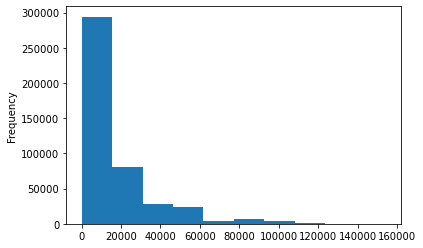

In [12]:
import matplotlib.pyplot as plt
ctd_merge['Customer_Lifetime_value'].plot(kind='hist')

In [13]:
criteria = [ctd_merge['Customer_Lifetime_value'].between(0, 20000), 
            ctd_merge['Customer_Lifetime_value'].between(20001, 50000), 
            ctd_merge['Customer_Lifetime_value'].between(50001, 80000),
            ctd_merge['Customer_Lifetime_value'].between(80001, 100000)]
values = ['Copper', 'Silver', 'Gold', 'Platinum']

ctd_merge['CLV_Category'] = np.select(criteria, values, 'Platinum' )

In [14]:
ctd_merge.head()

,user_id,price,Total_visits,Customer_Lifetime_value,CLV_Category
0,138340325,93.50,1,5610,Copper
1,225644257,40.91,1,2454,Copper
2,253299396,246.85,1,14811,Copper
3,256164170,113.23,1,6793,Copper
4,267316896,189.71,1,11382,Copper


In [15]:
ctd_merge.to_csv('LTV.csv')